# 1.Define problems

- **Problem:** Find Association Rules  

- **Target:** Find connections between items

- **Data:** https://www.kaggle.com/code/kelsead/market-basket-analysis/data

# 2. Data Overview

**Import Libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load and overview data**

In [ ]:
# Load data then show first 5 rows
df = pd.read_csv('/content/drive/MyDrive/CV/Data analysis projects/data/market_baskets.csv', sep=';')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
# Show last 5 rows
df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,09.12.2011 12:50,"4,95",12680.0,France


In [ ]:
# Show shape
df.shape

(522064, 7)

In [ ]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# Show basic info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BillNo,522064.0,21665.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Itemname,520609,4185,WHITE HANGING HEART T-LIGHT HOLDER,2269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,522064.0,NaN,NaN,NaN,10.090435,161.110525,-9600.0,1.0,3.0,10.0,80995.0
Date,522064,19641,31.10.2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,522064,1285,"1,25",48778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,388023.0,NaN,NaN,NaN,15316.93171,1721.846964,12346.0,13950.0,15265.0,16837.0,18287.0
Country,522064,30,United Kingdom,487622,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:**
- Drop unhelpful columns for Association Rules: Date, CustomerID, Country, Price 

# 3. Data Processing

In [ ]:
# Drop unnecessary columns 
keep_columns = ['BillNo', 'Itemname', 'Quantity','Price']
df_new = df[keep_columns]

In [ ]:
# Change to float
df_new['Price'] = df_new['Price'].str.replace(',', '.').astype(float)

In [ ]:
df_new.head()

,BillNo,Itemname,Quantity,Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,536365,WHITE METAL LANTERN,6,3.39
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [ ]:
# Lower itemname 
df_new['Itemname'] = df_new['Itemname'].str.lower()

In [ ]:
# Check nulls
df_new.isnull().sum()

BillNo         0
Itemname    1455
Quantity       0
Price          0
dtype: int64

In [ ]:
# Drop nulls
df_new = df_new.dropna()

In [ ]:
# Check duplicates
df_new.duplicated().sum()

5285

In [ ]:
# Drop duplicates
df_new = df_new.drop_duplicates()

In [ ]:
# Get item's names 
itemnames_columns = df_new['Itemname'].unique()
print(len(itemnames_columns))

4168


In [ ]:
# Chỉ lấy Quantity > 0 
df_new = df_new[df_new['Quantity'] >= 0]

In [ ]:
table = df_new.groupby(['BillNo','Itemname'])['Quantity'].sum().unstack().reset_index().fillna(np.nan)
table = table.drop(columns='BillNo')
print(len(table.columns))
table.head()

4051


Itemname,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
table.sum() 

Itemname
*boombox ipod classic                  1.0
*usb office mirror ball                2.0
10 colour spaceboy pen              6300.0
12 coloured party balloons          2074.0
12 daisy pegs in wood box            296.0
                                     ...  
zinc t-light holder stars small     4981.0
zinc top  2 door wooden shelf         13.0
zinc willie winkie  candle stick    2838.0
zinc wire kitchen organiser           28.0
zinc wire sweetheart letter tray      75.0
Length: 4051, dtype: float64

In [ ]:
# Create Transaction format
def encode_units(x):
    if x <= 0 or x == np.nan:
        return False
    if x >= 1:
        return True
    else: 
        return False

table_cleaned = table.applymap(encode_units)
table_cleaned.head()

Itemname,*boombox ipod classic,*usb office mirror ball,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Build Model

In [ ]:
# Choose min support 
min_support = 0.02 # min_support = 0.02 means that we expect around 394 people buy item i 

# Find frequent itemsets
frequent_itemsets = apriori(table_cleaned, min_support=min_support, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.023154,(3 stripey mice feltcraft)
1,0.023509,(4 traditional spinning tops)
2,0.047728,(6 ribbons rustic charm)
3,0.021128,(60 cake cases dolly girl design)
4,0.030400,(60 cake cases vintage christmas)


**Association rules by confidence**

In [ ]:
# Choose min confidence
min_confidence_threshold = 0.1
# Find association rules
association_rules_df_by_confidence = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence_threshold).sort_values(by=['confidence'], ascending=False)
association_rules_df_by_confidence.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
162,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.028880,0.049400,0.026093,0.903509,18.289798,0.024666,9.851677
160,"(green regency teacup and saucer, pink regency...",(roses regency teacup and saucer),0.030653,0.051325,0.026093,0.851240,16.585308,0.024520,6.377205
27,(pink regency teacup and saucer),(green regency teacup and saucer),0.037290,0.049400,0.030653,0.822011,16.640029,0.028811,5.340778
168,"(jumbo storage bag suki, jumbo bag pink polkadot)",(jumbo bag red retrospot),0.026042,0.104575,0.020874,0.801556,7.664883,0.018151,4.512239
142,(pink regency teacup and saucer),(roses regency teacup and saucer),0.037290,0.051325,0.028880,0.774457,15.089288,0.026966,4.206174


**Association rules by lift**

In [ ]:
# Choose min lift 
min_lift_threshold = 1.5
# Find association rules
association_rules_df_by_lift = association_rules(frequent_itemsets, metric='lift', min_threshold=min_lift_threshold).sort_values(by=['lift'], ascending=False)
association_rules_df_by_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
161,"(green regency teacup and saucer, roses regenc...",(pink regency teacup and saucer),0.037037,0.037290,0.026093,0.704514,18.892663,0.024712,3.258059
164,(pink regency teacup and saucer),"(green regency teacup and saucer, roses regenc...",0.037290,0.037037,0.026093,0.699728,18.892663,0.024712,3.206972
162,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.028880,0.049400,0.026093,0.903509,18.289798,0.024666,9.851677
163,(green regency teacup and saucer),"(pink regency teacup and saucer, roses regency...",0.049400,0.028880,0.026093,0.528205,18.289798,0.024666,2.058353
27,(pink regency teacup and saucer),(green regency teacup and saucer),0.037290,0.049400,0.030653,0.822011,16.640029,0.028811,5.340778


# 5. Conclusion 

## 5.1 Visualize

In [ ]:
support = association_rules_df_by_confidence['support'].values
confidence = association_rules_df_by_confidence['confidence'].values
lift = association_rules_df_by_confidence['lift'].values

In [ ]:
metrics_dic = {'support':support, 'confidence':confidence, 'lift':lift}
metrics_df = pd.DataFrame(metrics_dic)
metrics_df.head()

,support,confidence,lift
0,0.026093,0.903509,18.289798
1,0.026093,0.851240,16.585308
2,0.030653,0.822011,16.640029
3,0.020874,0.801556,7.664883
4,0.028880,0.774457,15.089288


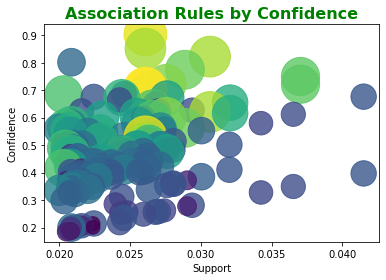

In [ ]:
plt.scatter(support, confidence, c=lift, marker="o", s=lift*100, alpha=0.8)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules by Confidence', fontdict={'weight':'bold','color':'g', 'fontsize':16})
plt.show()

In [ ]:
fig = px.scatter_3d(metrics_df, x='support', y='confidence', z='lift',
              color='lift')
fig.show()

## 5.2 Product has highest support

In [ ]:
frequent_itemsets.sort_values(by='support', ascending=False).iloc[:2,:]

,support,itemsets
276,0.111567,(white hanging heart t-light holder)
104,0.104575,(jumbo bag red retrospot)


**Comment:** 

- WHITE HANGING HEART T-LIGHT HOLDER has highest support, JUMBO BAG RED RETROSPOT is the second. 

In [ ]:
# Find products usually bought with WHITE HANGING HEART T-LIGHT HOLDER by confidence metric
most_frequent_product = 'white hanging heart t-light holder'
list_of_antecedents = [list(x)[0] for x in association_rules_df_by_confidence['antecedents']] # Sử dụng theo metric confidence
most_frequent_product_indexes = []
for index, item in enumerate(list_of_antecedents):
    if item == most_frequent_product:
        most_frequent_product_indexes.append(index)

association_rules_df_by_confidence.iloc[most_frequent_product_indexes]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
145,(white hanging heart t-light holder),(red hanging heart t-light holder),0.111567,0.036530,0.024269,0.217530,5.954757,0.020194,1.231318
84,(white hanging heart t-light holder),(jumbo bag red retrospot),0.111567,0.104575,0.022394,0.200727,1.919448,0.010727,1.120299
135,(white hanging heart t-light holder),(natural slate heart chalkboard),0.111567,0.062421,0.020824,0.186649,2.990164,0.013860,1.152736
157,(white hanging heart t-light holder),(wooden picture frame white finish),0.111567,0.055328,0.020520,0.183924,3.324269,0.014347,1.157579


In [ ]:
# # Find products usually bought with WHITE HANGING HEART T-LIGHT HOLDER by lift metric
 
list_of_antecedents = [list(x)[0] for x in association_rules_df_by_lift['antecedents']] # Sử dụng theo metric lift
most_frequent_product_indexes = []
for index, item in enumerate(list_of_antecedents):
    if item == most_frequent_product:
        most_frequent_product_indexes.append(index)

association_rules_df_by_lift.iloc[most_frequent_product_indexes]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
145,(white hanging heart t-light holder),(red hanging heart t-light holder),0.111567,0.036530,0.024269,0.217530,5.954757,0.020194,1.231318
157,(white hanging heart t-light holder),(wooden picture frame white finish),0.111567,0.055328,0.020520,0.183924,3.324269,0.014347,1.157579
135,(white hanging heart t-light holder),(natural slate heart chalkboard),0.111567,0.062421,0.020824,0.186649,2.990164,0.013860,1.152736
84,(white hanging heart t-light holder),(jumbo bag red retrospot),0.111567,0.104575,0.022394,0.200727,1.919448,0.010727,1.120299


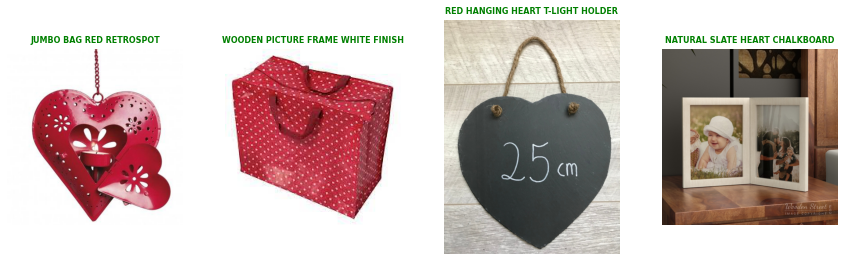

In [ ]:
# Visualize image
import os 
from PIL import Image
images = []
for file_name in os.listdir('/content/drive/MyDrive/LDS6_K279_ONLINE_NguyenAnhNhat/LDS6_K279_NguyenAnhNhat_Cuoi_ky/Image'):
  img = Image.open(os.path.abspath('/content/drive/MyDrive/LDS6_K279_ONLINE_NguyenAnhNhat/LDS6_K279_NguyenAnhNhat_Cuoi_ky/Image/{}'.format(file_name)))
  images.append(img)

rows, cols = 1, 4
product_name_titles = [
    'JUMBO BAG RED RETROSPOT',
    'WOODEN PICTURE FRAME WHITE FINISH',
    'RED HANGING HEART T-LIGHT HOLDER',
    'NATURAL SLATE HEART CHALKBOARD',
] 

plt.figure(figsize=(12,8))
for i in range(1, len(images)+1):
  plt.subplot(rows, cols, i)
  plt.imshow(images[i-1])
  plt.title(product_name_titles[i-1], fontdict={'weight':'bold','color':'g','fontsize':8})
  plt.axis('off')
plt.tight_layout()
plt.show()

**Comment:**
- According to **confidence**, WHITE HANGING HEART T-LIGHT HOLDER usually bought with:

        - RED HANGING HEART T-LIGHT HOLDER
        - JUMBO BAG RED RETROSPOT

- According to **lift**, WHITE HANGING HEART T-LIGHT HOLDER usually bought with:

        - RED HANGING HEART T-LIGHT HOLDER
        - JUMBO BAG RED RETROSPOT
        - NATURAL SLATE HEART CHALKBOARD 
        - WOODEN PICTURE FRAME WHITE FINISH

**Conclusion:**
- The predictive model is reasonable because all combinations belong to **the group of ornaments (Hanging heart-shape holder specifically)**  

## 5.3 Top 15 most/least bought

### Top 15 most bought

In [ ]:
# Create total sales
df_new['Total_sales'] = df_new['Quantity'] * df_new['Price']
total_sales = df_new['Total_sales'].sum()

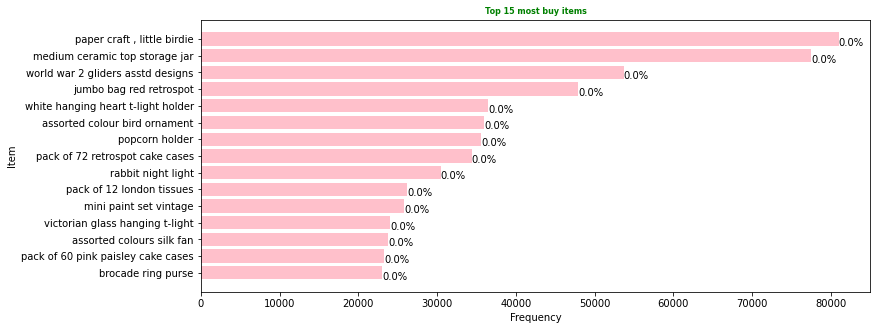

In [ ]:
# Top 15 most bought 
top_15_most_buy = df_new.groupby('Itemname')[['Quantity','Total_sales']].sum().sort_values(by='Quantity',ascending=False)[:15].sort_values(by='Quantity',ascending=True)
# Visualize count plot
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(top_15_most_buy.index, top_15_most_buy['Quantity'], color='pink')
ax.set_title('Top 15 most buy items', fontdict={'weight':'bold','color':'g','fontsize':8})
ax.set_ylabel('Item')
ax.set_xlabel('Frequency')
for i, p in enumerate(ax.patches):
  x = p.get_width()
  y = p.get_y()
  percentage_total_sales = top_15_most_buy['Total_sales'][i] / total_sales
  ax.annotate(s='{:.1%}'.format(percentage_total_sales/total_sales),xy=(x, y))
plt.show()

**Comment:**
- Purchase volume is high but contributes very little to total revenue -> Maybe 2 reasons: (1) low price; (2) this store has many Skus .

### Top 15 least bought

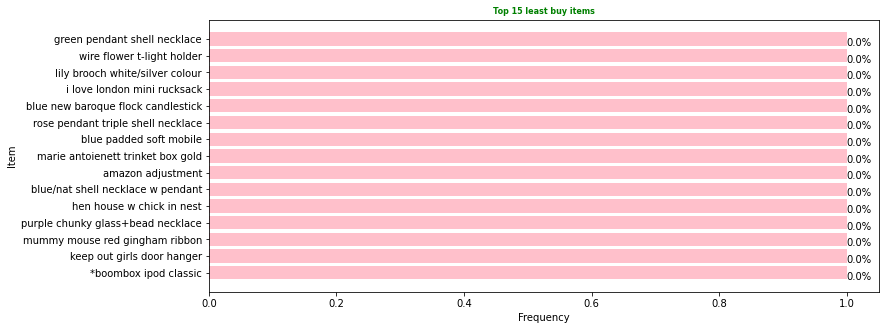

In [ ]:
# Top 15 least bought 
top_15_least_buy = df_new.groupby('Itemname')[['Quantity','Total_sales']].sum().sort_values(by='Quantity',ascending=True)[:15].sort_values(by='Quantity',ascending=False)
# Visualize count plot
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(top_15_least_buy.index, top_15_least_buy['Quantity'], color='pink')
ax.set_title('Top 15 least buy items', fontdict={'weight':'bold','color':'g','fontsize':8})
ax.set_ylabel('Item')
ax.set_xlabel('Frequency')
for i, p in enumerate(ax.patches):
  x = p.get_width()
  y = p.get_y()
  percentage_total_sales = top_15_least_buy['Total_sales'][i] / total_sales
  ax.annotate(s='{:.1%}'.format(percentage_total_sales/total_sales),xy=(x, y))
plt.show()

**Comment:**
- All items are only bought once

### Top 15 highest sales

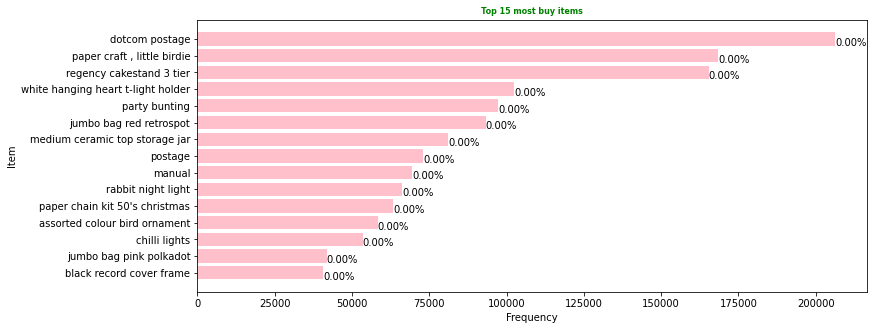

In [ ]:
# Top 15 highest sales 
top_15_highest_total_sales = df_new.groupby('Itemname')[['Quantity','Total_sales']].sum().sort_values(by='Total_sales',ascending=False)[:15].sort_values(by='Total_sales',ascending=True)
# Visualize count plot
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(top_15_highest_total_sales.index, top_15_highest_total_sales['Total_sales'], color='pink')
ax.set_title('Top 15 most buy items', fontdict={'weight':'bold','color':'g','fontsize':8})
ax.set_ylabel('Item')
ax.set_xlabel('Frequency')
for p in ax.patches:
  x = p.get_width()
  y = p.get_y()
  percentage_total_sales = p.get_width() / total_sales
  ax.annotate(s='{:.2%}'.format(percentage_total_sales/total_sales),xy=(x, y))
plt.show()

**Comment:**
- No product contributing much to the total revenue.

**Conclusion:**
- In order to increase sales, we have to put items that are likely to be purchased together nearer. This is because there's no **key product** contributing more than 10% of revenue, therefore we can only increase sales by selling more items together.